# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [5]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      18442 non-null  int64 
 1   Title                    18442 non-null  object
 2   Review Text              18442 non-null  object
 3   Positive Feedback Count  18442 non-null  int64 
 4   Division Name            18442 non-null  object
 5   Department Name          18442 non-null  object
 6   Class Name               18442 non-null  object
 7   Recommended IND          18442 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64
                Age  Positive Feedback Count  Recommended IND
count  18442.000000             18442.000000     18442.000000
mean      43.383635                 2.697484         0.816235
std       12.246264                 5.942220         0.387303
min       18.000000                 0.000000         0.000000
25%       34.000000                 0.000000         1.000000
50%       41.000000                 1.000000         1.000000
75%       52.000000                 3.000000         1.000000
max       99.000000               122.000000         1.000000


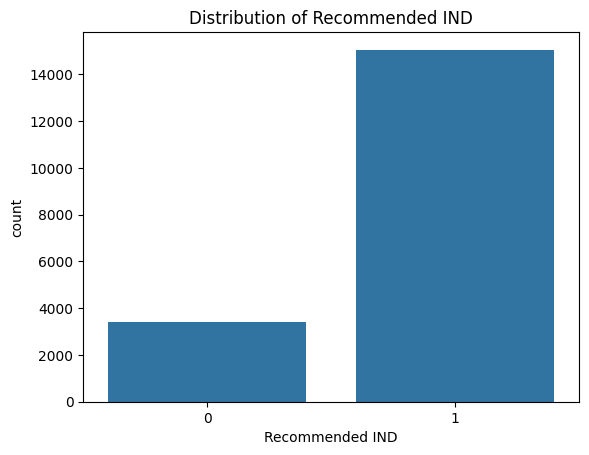

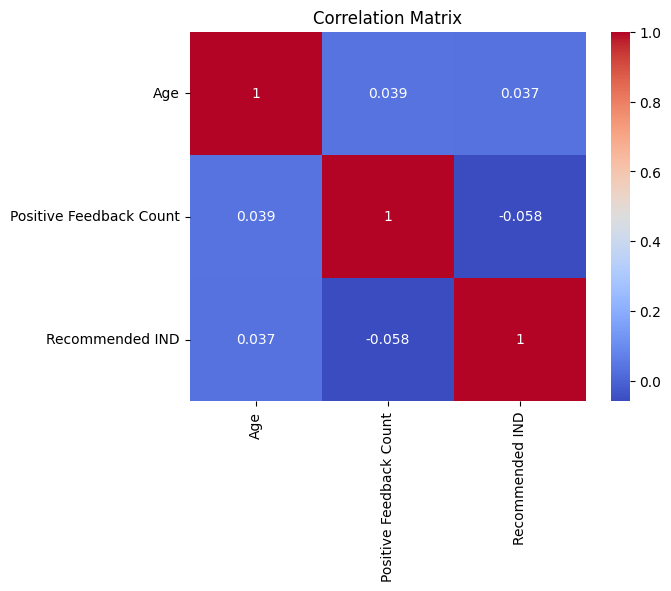

Unique values in Division Name: ['General' 'General Petite']
Unique values in Department Name: ['Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' 'Intimate']
Unique values in Class Name: ['Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Sweaters' 'Skirts'
 'Fine gauge' 'Jackets' 'Trend' 'Lounge' 'Jeans' 'Shorts' 'Casual bottoms']


In [8]:
df = data.copy()
df = df.drop(columns=['Clothing ID'])

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical features
print(df.describe())

# Check the distribution of the target variable
sns.countplot(x='Recommended IND', data=df)
plt.title('Distribution of Recommended IND')
plt.show()

# Check the correlation between numerical variables
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Example of unique values in categorical columns
print("Unique values in Division Name:", df['Division Name'].unique())
print("Unique values in Department Name:", df['Department Name'].unique())
print("Unique values in Class Name:", df['Class Name'].unique())

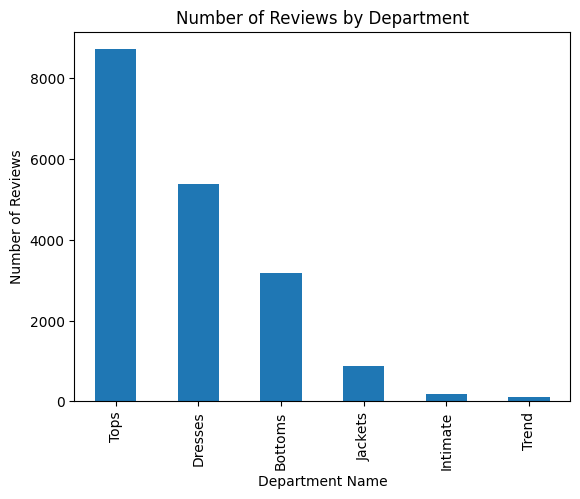

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Name: count, dtype: int64

In [ ]:
# Most Popular Departments
department_counts = df['Department Name'].value_counts()

# Bar plot
department_counts.plot(kind='bar')
plt.title('Number of Reviews by Department')
plt.xlabel('Department Name')
plt.ylabel('Number of Reviews')
plt.show()



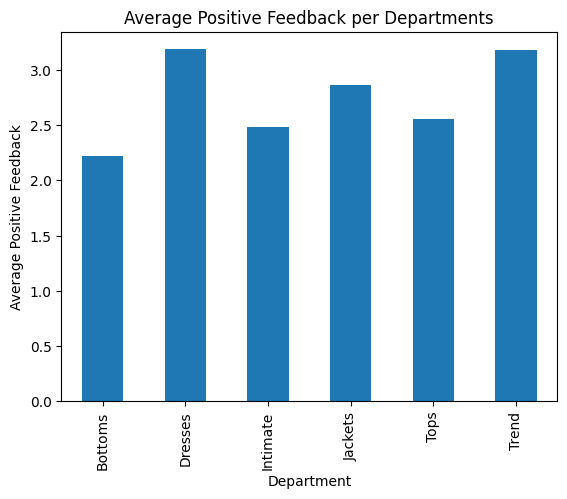

In [13]:
# Get average Feedback per department

avg_feedback_by_dept = df.groupby('Department Name')['Positive Feedback Count'].mean()

avg_feedback_by_dept.plot(kind= 'bar')
plt.title('Average Positive Feedback per Departments')
plt.xlabel("Department")
plt.ylabel("Average Positive Feedback")
plt.show()

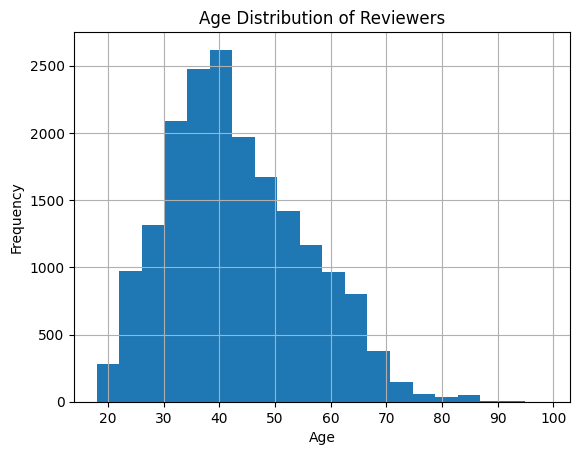

In [14]:
# Histogram of Age
df['Age'].hist(bins=20)
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

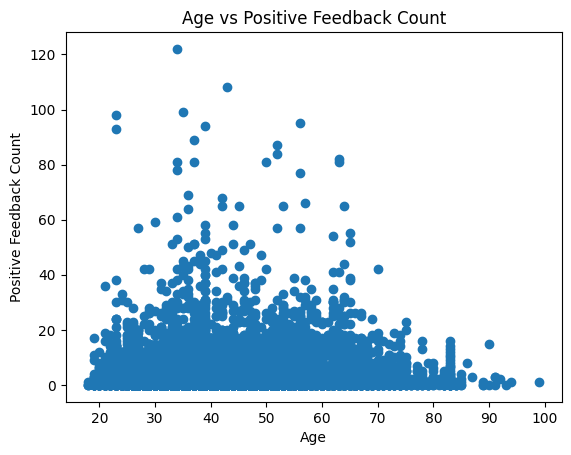

In [17]:
plt.scatter(df['Age'], df['Positive Feedback Count'])
plt.title('Age vs Positive Feedback Count')
plt.xlabel('Age')
plt.ylabel('Positive Feedback Count')
plt.show()

## Building Pipeline

In [54]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer


# Define the columns
numerical_columns = ['Age', 'Positive Feedback Count']
categorical_columns = ['Division Name', 'Department Name', 'Class Name']
text_columns = ['Review Text']

# Preprocessing steps for different types of data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Normalize the numerical data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))  # Drop one category to avoid dimensionality issues
])

text_transformer = Pipeline(steps=[
     ('dimension_reshaper', FunctionTransformer(np.reshape,kw_args={'newshape':-1})),
   ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))
])

# Combine all transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('tfidf_text', text_transformer, text_columns)
    ])


## Training Pipeline

In [55]:
# X = X.drop('Clothing ID', axis=1)
X.head()

,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('Recommended IND', axis=1)
y = df['Recommended IND'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

# Define the full pipeline (preprocessing + classifier)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model pipeline
model_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8484684196259149
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.24      0.37       692
           1       0.85      0.99      0.91      2997

    accuracy                           0.85      3689
   macro avg       0.84      0.61      0.64      3689
weighted avg       0.85      0.85      0.81      3689



In [63]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8484684196259149
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.24      0.37       692
           1       0.85      0.99      0.91      2997

    accuracy                           0.85      3689
   macro avg       0.84      0.61      0.64      3689
weighted avg       0.85      0.85      0.81      3689



## Fine-Tuning Pipeline

In [65]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50,100, 200],
    'classifier__max_depth': [5, 10, 15, 20],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best parameters found: ", grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy after hyperparameter tuning:", accuracy_score(y_test, y_pred))
print("Classification Report after tuning:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categorie

Best parameters found:  {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Accuracy after hyperparameter tuning: 0.8126863648685281
Classification Report after tuning:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       692
           1       0.81      1.00      0.90      2997

    accuracy                           0.81      3689
   macro avg       0.91      0.50      0.45      3689
weighted avg       0.85      0.81      0.73      3689

